# 基于Python和NumPy的随机梯度下降算法
## 内容列表
- 基础梯度下降算法
  - 损失函数：优化目标
  - 函数梯度：重温微积分
  - 梯度下降背后的直觉
  - 实现基础梯度下降算法
  - 学习速率的影响
- 梯度下降算法应用
  - 小例子
  - 常规最小二乘法
  - 改进程序
- 随机梯度下降算法
  - 随机梯度下降的小批量
  - 随机梯度下降的动量
  - 随机初值
- Keras和TensorFlow的随机梯度下降
- 总结

[随机梯度下降](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)是机器学习中常用的一种优化算法，用于寻找与预测输出和实际输出之间的最佳拟合相对应的模型参数。这是一种不精确但强有力的技术。

随机梯度下降在机器学习中有着广泛的应用。与[反向传播](https://brilliant.org/wiki/backpropagation/)相结合，在[神经网络](https://realpython.com/python-keras-text-classification/#a-primer-on-deep-neural-networks)训练中占主导地位。

__在本教程中，你将学到：__

- **梯度下降**和**随机梯度下降**算法的工作原理
- 如何应用梯度下降和随机梯度下降在机器学习中**最小化损失函数**
- 什么是**学习速率**，为什么它很重要，以及它如何影响结果
- 如何**自己编写函数**实现梯度下降算法

## 基础梯度下降算法
[梯度下降算法](https://en.wikipedia.org/wiki/Gradient_descent)是一种用于[数学优化](https://en.wikipedia.org/wiki/Mathematical_optimization)的近似和迭代方法。你可以用它逼近任意[可微分函数](https://en.wikipedia.org/wiki/Differentiable_function)的最小值。

虽然梯度下降算法有时会陷入[局部极小值](https://en.wikipedia.org/wiki/Local_optimum)或[鞍点](https://en.wikipedia.org/wiki/Saddle_point)，而不是寻找全局最小值，但它在实际中得到了广泛应用。[数据科学](https://realpython.com/learning-paths/data-science-python-core-skills/)和[机器学习](https://realpython.com/learning-paths/machine-learning-python/)方法通常用它来优化内部模型参数。例如，神经网络利用梯度下降寻找[权重和偏差](https://docs.paperspace.com/machine-learning/wiki/weights-and-biases)。

### 损失函数：优化目标
**损失函数**或[成本函数](https://en.wikipedia.org/wiki/Loss_function)是通过改变决策变量来最小化（或最大化）的函数。许多机器学习方法都隐式地解决优化问题。它们倾向于通过调整模型参数（如[神经网络](https://en.wikipedia.org/wiki/Artificial_neural_network)的权重和偏差，[随机森林](https://en.wikipedia.org/wiki/Random_forest)或[梯度提升](https://en.wikipedia.org/wiki/Gradient_boosting)的决策规则等）来最小化实际输出和预测输出之间的差异。

在[回归问题](https://realpython.com/linear-regression-in-python/#regression)中，通常有输入变量向量 𝐱 = (𝑥₁, …, 𝑥ᵣ) 和实际输出 𝑦。要找到一个模型可以将 𝐱 映射到预测响应 𝑓(𝐱) ，使得 𝑓(𝐱) 与 𝑦 尽可能接近。例如，给定某人在公司的年数和受教育程度等输入，预测类似个人工资的输出。

目标是最小化预测 𝑓(𝐱) 和实际数据 𝑦 之间的差异。这个差值叫做**残差**。

这类问题将最小化[残差平方和 (SSR)](https://en.wikipedia.org/wiki/Residual_sum_of_squares), 其中 SSR = Σᵢ(𝑦ᵢ − 𝑓(𝐱ᵢ))² 对于所有观测 𝑖 = 1, …, 𝑛, 𝑛 是总的观测数。或者可以使用[均方误差](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE = SSR / 𝑛) 替代。

SSR和MSE都使用实际输出和预测输出之差的平方。差值越小，预测越准确。差值为零表示预测值与实际数据相等。

通过调整模型参数最小化 SSR 或者 MSE。例如，在[线性回归](https://realpython.com/linear-regression-in-python/)中，要找到函数 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ，确定权重 𝑏₀, 𝑏₁, …, 𝑏ᵣ 以最小化 SSR 或 MSE。

在[分类问题](https://realpython.com/logistic-regression-python/#classification)中，输出 𝑦 是[可分类](https://en.wikipedia.org/wiki/Categorical_variable)的，通常是 0 或 1。例如，判断电子邮件是否为垃圾邮件。在二进制输出的情况下，可以方便地最小化[交叉熵](https://en.wikipedia.org/wiki/Cross_entropy)函数，该函数也取决于实际输出 𝑦ᵢ 和相应的预测 𝑝(𝐱ᵢ):
$$
H=-\sum_i(y_i\log(p(\mathbf{x}_i))+(1-y_i)\log(1-p(\mathbf{x}_i)))
$$
在通常用于解决分类问题的[逻辑回归](https://realpython.com/logistic-regression-python/)中，函数 𝑝(𝐱) 和 𝑓(𝐱) 定义如下：
$$
p(\mathbf{x})=\frac{1}{1+\exp(-f(\mathbf{x}))}
$$
$$
f(\mathbf{x})=b_0+b_1x_1+\dots+b_rx_r
$$
同样，需要找到权重 𝑏₀, 𝑏₁, …, 𝑏ᵣ，但这次应该最小化交叉熵函数。

### 函数的梯度：重温微积分
在微积分中，函数的[导数](https://www.mathsisfun.com/calculus/derivatives-introduction.html)显示了当修改一个或多个参数时一个值的变化量。导数对于优化非常重要，因为[零导数](http://sofia.nmsu.edu/~breakingaway/ebookofcalculus/MeaningOfDerivativesAndIntegrals/WhatDoesItMeanThatTheDerivativeOfAFunctionEquals0/WhatDoesItMeanThatTheDerivativeOfAFunctionEquals0.html)可能表示最小值、最大值或鞍点。

多个自变量的函数 𝐶 的[梯度](https://en.wikipedia.org/wiki/Gradient) 𝑣₁，…，𝑣ᵣ 用 ∇𝐶（𝑣₁，…，𝑣ᵣ）表示，并定义为 𝐶 对每个自变量的[偏导数](https://en.wikipedia.org/wiki/Partial_derivative)的向量函数：∇𝐶=（∂𝐶/∂𝑣₁，…，∂𝐶/𝑣ᵣ）。符号 ∇ 读作[nabla](https://en.wikipedia.org/wiki/Nabla_symbol)。

函数 𝐶 在给定点的梯度的非零值定义了 𝐶 最快增长的方向和速率。当使用梯度下降时，对损失函数中下降最快的方向感兴趣。这个方向由负梯度 -∇𝐶 决定。

### 梯度下降背后的直觉
为了理解梯度下降算法，想象一滴水从碗边滑下来，或者一个球从山上滚下来。水滴和球倾向于朝着下降最快的方向移动，直到它们到达底部。随着时间的推移，它们将获得动量并加速。

梯度下降背后的思想是相似的：从一个任意选择的点或向量的位置开始，然后沿着损失函数下降最快的方向迭代移动。如前所述，这是负梯度向量 -∇𝐶 的方向。

有了一个随机的开始点 𝐯 = (𝑣₁，…，𝑣ᵣ)，**更新**它，或者把它在负梯度的方向上移到一个新的位置：𝐯 → 𝐯 − 𝜂∇𝐶，其中 𝜂（发音为“ee tah”）是一个称为**学习速率**的小正值。

学习速率决定更新或移动步骤的大小。这是一个非常重要的参数。如果 𝜂 太小，则该算法可能收敛非常慢。较大的 𝜂 值也可能导致不收敛或使算法发散。

### 基础梯度下降法的实现
现在已经知道了基本的梯度下降是如何工作的，就可以用Python实现它了。将只使用普通的Python和[NumPy](https://numpy.org/)，这使能够在使用数组（或向量）时编写[简洁的代码](https://realpython.com/numpy-array-programming/)并获得[性能提升](https://realpython.com/numpy-tensorflow-performance/)。

这是该算法的一个基本实现，从任意点开始，迭代地将其移向最小值，并[返回](https://realpython.com/python-return-statement/)一个有望达到或接近最小值的点：

In [1]:
def gradient_descent(gradient, start, learn_rate, n_iter):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
    return vector

```gradient_descent()```有4个参数：

1. **gradient**是一个[函数](https://realpython.com/defining-your-own-python-function/)或任何Python[可调用对象](https://docs.python.org/3/reference/datamodel.html#emulating-callable-objects)，它接受一个向量并返回要最小化的函数的梯度。

2. **start**是算法开始搜索的点，以序列（[元组、列表](https://realpython.com/python-lists-tuples/)、[NumPy数组](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)等）或标量（在一维问题中）的形式给出。

3. **learn_rate**是控制向量更新幅度的学习速率。

4. **n_iter**是迭代次数。

这个函数正好完成了[上面](https://realpython.com/gradient-descent-algorithm-python/#intuition-behind-gradient-descent)描述的操作：它获取一个起点（第2行），根据学习速率和梯度值（第3到5行）迭代更新它，最后返回找到的最后一个位置。

在使用```gradient_descent()```之前，可以增加一个结束条件：

In [2]:
import numpy as np

def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = []
    vector.append(start)
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector[-1])
        if np.all(np.abs(diff) <= tolerance):
            break
        vector.append(vector[-1] + diff)
    return np.array(vector)

现在有了额外的参数```tolerance```（第4行），它指定了每个迭代中允许的最小移动。还为```tolerance```和```n_iter```定义了默认值，因此不必每次调用```gradient_descent()```时都指定它们。

如果当前迭代中的向量更新小于或等于```tolerance```，则第9行和第10行允许```gradient_descent()```停止迭代并在到达```n_iter```之前返回结果。这通常发生在最小值附近，在最小值处梯度通常很小。不幸的是，它也可能发生在局部极小值或鞍点附近。

第9行使用了方便的NumPy函数[numpy.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html)和[numpy.abs()](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)，在一个语句中比较了```diff```的绝对值和```tolerance```，这就是为什么在第一行```import numpy```。

现在有了```gradient_descent()```的第一个版本，该测试一下该函数。从一个小例子开始，找到函数[$C=v^2$](https://www.wolframalpha.com/input/?i=v**2)的最小值。

此函数只有一个自变量（𝑣），其梯度为导数 2𝑣。这是一个可微[凸函数]()，求其最小值的解析方法很简单。然而，在实践中，解析微分可能是困难的，甚至是不可能的，通常用[数值方法](https://en.wikipedia.org/wiki/Numerical_method)逼近。

只需一条语句即可测试该梯度下降算法：

In [3]:
vector = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.2)
vector[-1]

2.210739197207331e-06

使用[lambda函数](https://realpython.com/python-lambda/) lambda v: 2 * v 提供 𝑣² 的梯度。从值10.0开始，将学习速率设置为0.2。得到的结果非常接近于零，这是正确的最小值。

下图显示了解的迭代移动过程：

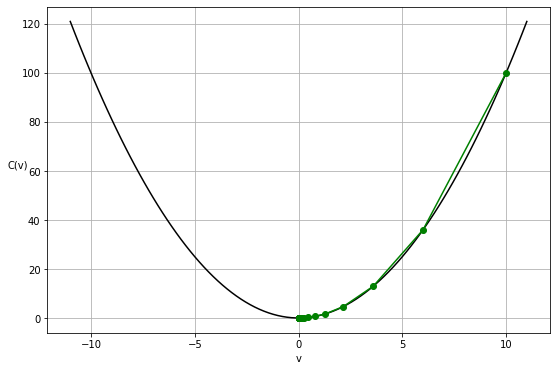

In [4]:
from matplotlib import pyplot as plt
v = np.linspace(-11.0, 11.0, 100)
plt.figure(figsize=(9, 6))
plt.plot(v, v**2, 'k')
plt.plot(vector, vector**2, 'go-')
plt.grid()
plt.xlabel('v')
plt.ylabel('C(v)', rotation='horizontal')
plt.show()

从最右边的绿点(𝑣 = 10)开始，向最小值(𝑣 = 0)移动。因为梯度（和坡度）的值更高，所以一开始更新更大。当接近最小值时，它们会变低。

### 学习速率影响
学习速率是算法的一个重要参数。不同的学习速率值会显著影响梯度下降行为。考虑上一个示例，但学习率为0.8而不是0.2：

In [5]:
vector = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.8)
print(vector[-1])

-4.77519666596786e-07


得到另一个非常接近于零的解，但是算法的内部行为是不同的。下面是迭代过程中 𝑣 值的变化：

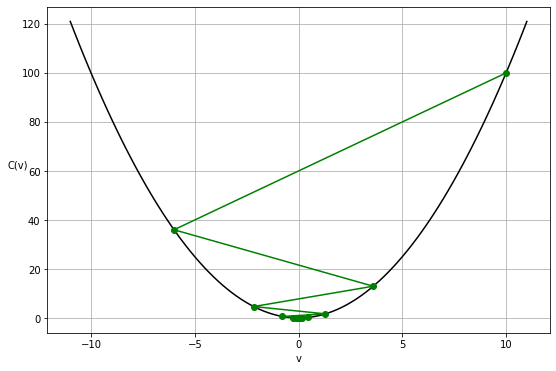

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(v, v**2, 'k')
plt.plot(vector, vector**2, 'go-')
plt.grid()
plt.xlabel('v')
plt.ylabel('C(v)', rotation='horizontal')
plt.show()

在本例中，再次从 𝑣 = 10 开始，但由于学习率较高，因此 𝑣 的变化很大，会传递到最佳值的另一边，并变为−6。它又穿过了几次零点，然后在它附近停了下来。

较小的学习速度会导致收敛非常缓慢。如果迭代次数有限，则算法可能在找到最小值之前返回。否则，整个过程可能需要大量的时间。为了说明这一点，再次运行```gradient_desccent()```，这次的学习率要小得多，为0.005：

In [7]:
vector = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.005)
print(vector[-1])

6.050060671375367


现在的结果是6.05，远未达到真正的最小值0。这是因为由于学习率很低，向量的变化非常小：

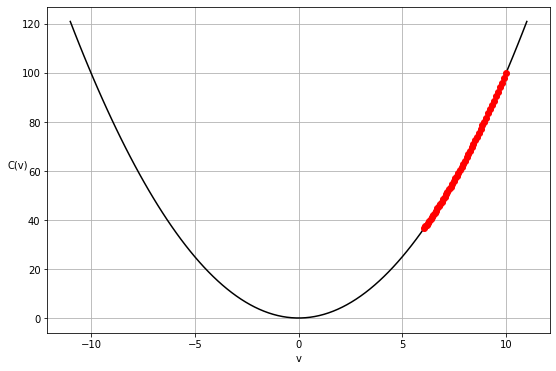

In [8]:
plt.figure(figsize=(9, 6))
plt.plot(v, v**2, 'k')
plt.plot(vector, vector**2, 'ro-')
plt.grid()
plt.xlabel('v')
plt.ylabel('C(v)', rotation='horizontal')
plt.show()

搜索过程像以前一样从 𝑣 = 10 开始，但它不能在50次迭代中达到零。但是，一百次迭代，误差会小得多，一千次迭代，误差会非常接近于零：

In [9]:
vector = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.005, n_iter=100)
print(vector[-1])

vector = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.005, n_iter=1000)
print(vector[-1])

vector = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.005, n_iter=2000)
print(vector[-1])

3.660323412732294
0.0004317124741065828
9.952518849647663e-05


非凸函数可能有局部极小值或鞍点，在那里算法可能被“陷住”。在这种情况下，对学习速率或起点的选择可以导致寻找的是局部还是全局最小值。

考虑函数 [$v^4-5v^2-3v$](https://www.wolframalpha.com/input/?i=v**4+-+5+*+v**2+-+3+*+v)。它的全局最小值在 𝑣 ≈ 1.7，局部最小值在 𝑣 ≈ -1.42。该函数的梯度为 $4v^3-10v-3$。让我们看看```gradient_descent()```是如何工作的：

In [10]:
vector = gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0, learn_rate=0.2)
print(vector[-1])

-1.4207567437458342


这次从零开始，算法在局部最小值附近结束。下面是具体过程：

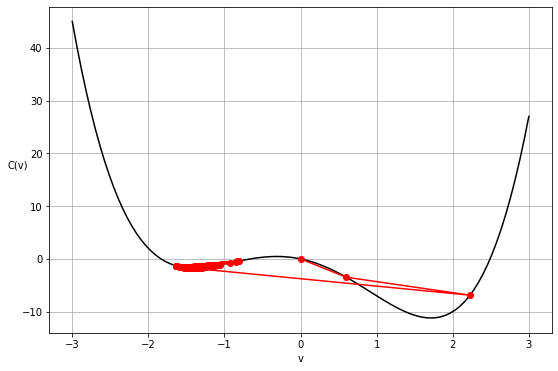

In [11]:
v = np.linspace(-3.0, 3.0, 100)
plt.figure(figsize=(9, 6))
plt.plot(v, v**4 - 5 * v**2 - 3 * v, 'k')
plt.plot(vector, vector**4 - 5 * vector**2 - 3 * vector, 'ro-')
plt.grid()
plt.xlabel('v')
plt.ylabel('C(v)', rotation='horizontal')
plt.show()

在前两次迭代中，向量朝着全局最小值移动，但随后它又交叉到另一侧，并被困在局部最小值中。可以通过较小的学习率来防止这种情况：

In [12]:
vector = gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0, learn_rate=0.1)
print(vector[-1])

1.285401330315467


当将学习率从0.2降低到0.1时，得到的解非常接近全局最小值。记住，梯度下降是一种近似方法。这一次，避免了跳到另一边：

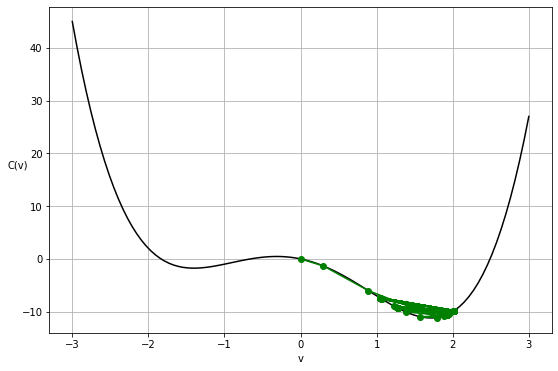

In [13]:
plt.figure(figsize=(9, 6))
plt.plot(v, v**4 - 5 * v**2 - 3 * v, 'k')
plt.plot(vector, vector**4 - 5 * vector**2 - 3 * vector, 'go-')
plt.grid()
plt.xlabel('v')
plt.ylabel('C(v)', rotation='horizontal')
plt.show()

较低的学习率可防止向量产生较大的跳跃，在这种情况下，向量仍然更接近全局最优值。

调整学习速率很棘手。你不能预先知道最好的值。有许多技术和启发试图帮助这一点。此外，机器学习实践者经常在模型选择和评估过程中调整学习速率。

除了学习率外，起始点对解的影响也很大，特别是对于非凸函数。

## 梯度下降算法的应用
在本节中，将看到两个使用梯度下降的简短示例。还将了解到它可以用于现实生活中的机器学习问题，如线性回归。在第二种情况下，需要修改```gradient_descent()```的代码，因为需要用观测数据来计算梯度。
### 简短的例子
首先，将```gradient_descent()```应用于另一个一维问题。以函数$v-\log(v)$为例。此函数的梯度为 1−1/𝑣。根据这些信息，可以找到其最小值：

In [14]:
vector = gradient_descent(gradient=lambda v: 1 - 1 / v, start=2.5, learn_rate=0.5)
print(vector[-1])

1.0000011077232125


使用提供的一组参数，```gradient_desccent()```可以正确地计算此函数的最小值，即 𝑣 = 1。可以尝试使用其他值作为学习速率和起点。

也可以对多个变量的函数使用```gradient_descent()```。应用程序是相同的，但是需要以向量或数组的形式提供梯度和起点。例如，可以找到函数[$v_1^2+v_2^4$](https://www.wolframalpha.com/input/?i=v_1**2+%2B+v_2**4)的最小值，该函数具有梯度向量（$2v_1$，$4v_2^3$）：

In [15]:
vector = gradient_descent(gradient=lambda v: np.array([2 * v[0], 4 * v[1]**3]), start=np.array([1.0, 1.0]), learn_rate=0.2, tolerance=1e-08)
print(vector[-1])

[8.08281277e-12 9.75207120e-02]


在本例中，梯度函数返回一个数组，起始值是一个数组，因此得到一个数组作为结果。结果值几乎等于零，因此可以说```gradient_descent()```正确地发现了这个函数的最小值为$v_1=v_2=0$。

### 普通最小二乘法
线性回归和[普通最小二乘法](https://en.wikipedia.org/wiki/Ordinary_least_squares)从观测的输入值 𝐱=(𝑥₁，…，𝑥ᵣ)和输出值 𝑦 开始。它们定义了一个线性函数 𝑓(𝐱)=𝑏₀+𝑏₁𝑥+⋯+𝑏ᵣ𝑥ᵣ，它尽可能接近 𝑦。

这是一个优化问题。求出能最小化残差平方和 SSR=∑∑ᵢ(𝑦ᵢ−𝑓(𝐱ᵢ))² 或均方误差 MSE = SSR / 𝑛 的权重 𝑏₀、𝑏₁、…、𝑏ᵣ。这里，𝑛 是观察的总数，并且 𝑖 = 1，…，𝑛。

还可以使用损失函数 𝐶 = SSR /(2𝑛)，这在数学上比 SSR 或 MSE 更方便。

线性回归最基本的形式是[简单的线性回归](https://realpython.com/linear-regression-in-python/#simple-linear-regression)。它只有一组输入𝑥和两个权重：𝑏₀ 和 𝑏₁。回归线方程为 𝑓(𝑥)= 𝑏₀ + 𝑏₁𝑥。虽然可以通过[解析计算](https://en.wikipedia.org/wiki/Ordinary_least_squares#Simple_linear_regression_model) 𝑏₀ 和 𝑏₁ 的最佳值，但将使用梯度下降法来确定它们。

首先，需要微积分来找到损失函数 𝐶 = ∑ᵢ(𝑦ᵢ−𝑏₀−𝑏₁𝑥ᵢ)²/(2𝑛) 的梯度。由于有两个决策变量，即 𝑏₀ 和 𝑏₁，因此梯度 ∇𝐶 是一个包含两个分量的向量：

1. ∂𝐶/∂𝑏₀ = (1/𝑛) Σᵢ(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) = mean(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ)
2. ∂𝐶/∂𝑏₁ = (1/𝑛) Σᵢ(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) 𝑥ᵢ = mean((𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) 𝑥ᵢ)

需要 𝑥 和 𝑦 的值来计算此损失函数的梯度。梯度函数的输入不仅是 𝑏₀ 和 𝑏₁，还有 𝑥 和 𝑦。可能是这样的：

In [16]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray

```ssr_gradient()```的参数包含观测输入和输出的数组 x 和 y，以及保存决策变量 𝑏₀ 和 𝑏₁ 的当前值的数组 b。此函数首先计算每个观测值的残差数组（```res```），然后返回 ∂𝐶/∂𝑏₀ 和 ∂𝐶/∂𝑏₁ 的值对。

在本例中，可以使用方便的NumPy方法[ndarray.mean()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html)，因为传递NumPy数组作为参数。

```gradient_descent()```需要做两个小的调整：

1. 在第4行添加 x 和 y 作为```gradient_descent()```的参数。

2. 为```gradient```函数提供 x 和 y，并确保将gradient元组转换为第8行的NumPy数组。

下面是```gradient_descent()```所做的更改：

In [17]:
import numpy as np

def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

```gradient_descent()```现在接受观测输入 x 和输出 y，并可以使用它们来计算梯度。将```gradient(x, y, vector)```的输出转换为NumPy数组可以实现梯度元素与学习率的元素级乘法，而对于单变量函数来说，这不是必须的。

现在应用新版本的```gradient_descent()```找到一些任意 x 和 y 值的回归线：

In [18]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

gradient_descent(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008, n_iter=100_000)

array([5.62822349, 0.54012867])

结果是一个数组，其中有两个值对应于决策变量：𝑏₀=5.63 和 𝑏₁=0.54。最佳回归线为𝑓(𝑥)=5.63+0.54𝑥。在前面的例子中，这个结果很大程度上取决于学习率。如果学习率太低或太高，可能得不到这么好的结果。

这个例子并不是完全随机的——它取自[Python中的线性回归教程](https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn)。好消息是，你已经得到了几乎与[sciket-learn的线性回归](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)相同的结果。数据和回归结果显示在[简单线性回归](https://realpython.com/linear-regression-in-python/#simple-linear-regression)部分。

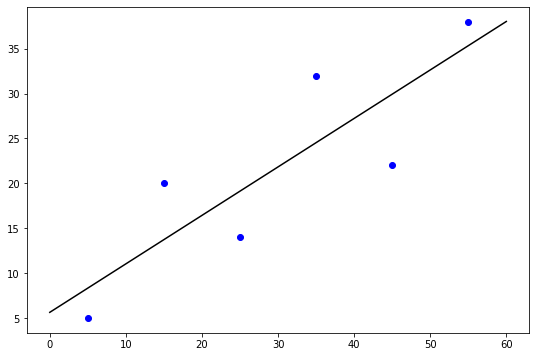

In [19]:
plt.figure(figsize=(9, 6))
plt.plot(x, y, 'bo')

X = np.linspace(0, 60, 100)
Y = 5.62822349 + 0.54012867 * X
plt.plot(X, Y, 'k-')
plt.show()

### 代码的改进
可以在不修改其核心功能的情况下，使```gradient_descent()```更加健壮、全面和美观：

In [20]:
import numpy as np

def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06,
    dtype="float64"
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    if x.shape[0] != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Recalculating the difference
        diff = -learn_rate * np.array(gradient(x, y, vector), dtype_)

        # Checking if the absolute difference is small enough
        if np.all(np.abs(diff) <= tolerance):
            break

        # Updating the values of the variables
        vector += diff

    return vector if vector.shape else vector.item()

```gradient_descent()```现在接受一个额外的```dtype```参数，该参数定义函数中NumPy数组的数据类型。有关NumPy类型的更多信息，请参阅有关[数据类型的官方文档](https://numpy.org/doc/stable/user/basics.types.html)。

在大多数应用程序中，您不会注意到32位和64位浮点数之间的差异，但在处理大型数据集时，这可能会显著影响内存使用，甚至可能影响[处理速度](https://stackoverflow.com/questions/15340781/python-numpy-data-types-performance)。例如，尽管NumPy默认使用64位浮点，但[TensorFlow通常使用32位十进制数](https://www.tensorflow.org/guide/tensor)。

除了考虑数据类型之外，上面的代码还引入了一些与类型检查和确保使用NumPy功能相关的修改：
- **第8行和第9行**检查```gradient```是否是Python可调用对象，以及它是否可以用作函数。如果不是，那么函数将引发[```TypeError```](https://docs.python.org/3/library/exceptions.html#TypeError)。
- **第12行**设置[```numpy.dtype```](https://numpy.org/doc/stable/reference/generated/numpy.dtype.html)，它将用作整个函数中所有数组的数据类型。
- **第15行**接受参数 x 和 y，并生成具有所需数据类型的NumPy数组。参数 x 和 y 可以是列表、元组、数组或其他序列。
- **第16行和第17**行比较 x 和 y 的大小。这很有用，因为希望确保两个数组具有相同数量的观测值。如果没有，那么函数将引发[```ValueError```](https://docs.python.org/3/library/exceptions.html#ValueError)。
- **第20行**将参数```start```转换为NumPy数组。这是一个有趣的技巧：如果```start```是一个Python标量，那么它将被转换成一个对应的NumPy对象（一个具有一个元素和零维的数组）。如果传递一个序列，那么它将成为一个具有相同元素数的常规NumPy数组。
- **第23行**对学习率做了同样的处理。这可能非常有用，因为它能够通过将列表、元组或NumPy数组传递给```gradient_descent```来为每个决策变量指定不同的学习速率。
- **第24行和第25行**检查学习率值（或所有变量的值）是否大于零。
- **第28行到第35行**同样地设置了```n_iter```和```tolerance```，并检查它们是否大于零。
- **第38行到第47行**与之前几乎相同。唯一的区别是第40行的梯度数组的类型。
- **第49行**可以方便地返回结果数组，如果有多个决策变量；如果只有一个变量，则返回Python标量。

```gradient_descent()```现在完成了。请随意添加一些附加功能或修改。本教程的下一步是使用到目前为止所学的知识来实现随机版本的梯度下降。

## 随机梯度下降算法
**随机梯度下降算法**是梯度下降算法的一种改进。在随机梯度下降法中，只使用随机的一小部分观测值而不是全部观测值来计算梯度。在某些情况下，这种方法可以减少计算时间。

**在线随机梯度下降**是随机梯度下降的一种变体，在这种情况下，您可以估计每个观测值的损失函数的梯度，并相应地更新决策变量。这可以帮助你找到全局最小值，特别是当目标函数是凸函数的时候。

**批量随机梯度下降法**介于普通梯度下降法和在线方法之间。梯度的计算和决策变量的更新迭代取决于所有观测子集，称为**小批量**。这种变体在训练神经网络时非常流行。

可以将在线算法想象为一种特殊的批处理算法，其中每个小批处理只有一个观测值。经典梯度下降是另一种特殊情况，在这种情况下，只有一批包含所有观测值。

### 随机梯度下降中的小批量问题
与普通梯度下降法一样，随机梯度下降法从决策变量的初始向量开始，通过多次迭代进行更新。两者的区别在于迭代中发生了什么：
- 随机梯度下降法将观测值集随机划分为小批量。
- 对于每个小批量，计算梯度并移动向量。
- 一旦使用了所有的迷你批处理，您就可以说迭代或**epoch**已经完成并开始下一个迭代。

此算法随机选择小批量的观察值，因此需要模拟这种随机（或伪随机）行为。可以用[随机数生成](https://realpython.com/python-random/)。Python有内置的[随机模块](https://docs.python.org/3/library/random.html)，NumPy有自己的[随机生成器](https://numpy.org/doc/stable/reference/random/generator.html)。使用数组时，后者更方便。

您将创建一个名为```sgd()```的新函数，该函数与```gradient_descent()```非常相似，但使用随机选择的小批量在搜索空间中移动：

In [21]:
import numpy as np

def sgd(
    gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,
    tolerance=1e-06, dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

这里有一个新参数。使用```batch_size```，可以指定每个小批次中的观察数。这是随机梯度下降的一个基本参数，可以显著影响性能。第34行到第39行确保```batch_size```是不大于观察总数的正整数。

另一个新参数是```random_state```。它在第22行定义了随机数生成器的种子。seed在第23行用作[```default_rng(https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)```]()的参数，```default_rng()```创建[生成器](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator)实例。

如果将参数 [None](https://realpython.com/null-in-python/) 传递给```random_state```，那么随机数生成器每次实例化时都将返回不同的数字。如果希望生成器的每个实例的行为方式完全相同，则需要指定```seed```。最简单的方法是提供任意整数。

第16行使用```x.shape[0]```推导观测值的数量。如果 x 是一维数组，那么这就是它的大小。如果 x 有两个维度，那么```.shape[0]```是行数。

在第19行中，使用[.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape)确保 x 和 y 都成为具有```n_obs```行的二维数组，并且 y 正好有一列。[```numpy.c_[]```](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape)方便地将 x 和 y 的列连接到一个数组 xy 中。这是使数据适合随机选择的一种方法。

最后，在第52行到第70行中，实现随机梯度下降的[```for loop```](https://realpython.com/python-for-loop/)。它不同于```gradient_descent()```。在第54行，您使用随机数生成器及其方法[```.shuffle()```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)对观察值进行洗牌。这是随机选择小批量的方法之一。

对每个小批量重复内部```for loop```。与普通梯度下降法的主要区别在于，在第62行，梯度是针对一个小批次（```x_batch```和```y_batch```）的观测值计算的，而不是针对所有观测值（x 和 y）。

在第59行，```x_batch```成为 xy 的一部分，其中包含当前小批次的行（从```start```到```stop```）和对应于 x 的列。```y_batch```保留 xy 中相同的行，但只保留最后一列（输出）。有关索引在NumPy中如何工作的更多信息，请参阅有关[索引的官方文档](https://numpy.org/doc/stable/reference/arrays.indexing.html)。

现在可以测试随机梯度下降的实现：

In [22]:
sgd(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,
    batch_size=3, n_iter=100_000, random_state=0)

array([5.63093736, 0.53982921])

结果与使用```gradient_descent()```得到的结果几乎相同。如果省略```random_state```或使用```None```，那么每次运行```sgd()```时都会得到一些不同的结果，因为随机数生成器对 xy 的洗牌方式不同。

### 随机梯度下降中的动量
正如已经看到的，学习率对梯度下降的结果有很大的影响。在算法执行期间，可以使用几种不同的策略来调整学习速率。也可以将**动量**应用到算法中。

可以利用动量来修正学习率的影响。其思想是记住向量的上一次更新，并在计算下一次更新时应用它。不需要准确地沿着负渐变的方向移动向量，但是倾向于保持方向和大小与上一次移动一致。

名为**衰减率**（decay rate）或**衰减因子**（decay factor）的参数定义了上一次更新的贡献有多大。要包含动量和衰减率，可以通过添加参数```decay_rate```来修改```sgd()```，并使用它来计算向量更新的方向和大小（```diff```）：

In [23]:
import numpy as np

def sgd(
    gradient, x, y, start, learn_rate=0.1, decay_rate=0.0, batch_size=1,
    n_iter=50, tolerance=1e-06, dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the decay rate
    decay_rate = np.array(decay_rate, dtype=dtype_)
    if np.any(decay_rate < 0) or np.any(decay_rate > 1):
        raise ValueError("'decay_rate' must be between zero and one")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Setting the difference to zero for the first iteration
    diff = 0

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = decay_rate * diff - learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

在这个实现中，在第4行添加```decay_rate```参数，在第34行将其转换为所需类型的NumPy数组，并在第35行和第36行检查它是否介于0和1之间。在第57行，在迭代开始之前初始化```diff```，以确保它在第一次迭代中可用。

最重要的变化发生在第71行。使用学习率和梯度重新计算```diff```，还加上衰减率和旧```diff```值的乘积。现在```diff```有两个部分：

1. **decay_rate * diff** 是动量，或者说是前一步的影响。

2. **-learn_rate * grad** 是当前梯度的影响。

衰减率和学习率作为定义两者贡献的权重。

###随机起始值
与普通梯度下降法不同，随机梯度下降法的出发点通常不太重要。对于用户来说，这也可能是一个不必要的困难，尤其是当有许多决策变量时。想象一下如果你需要手动初始化一个有数千个偏差和权重的神经网络的值！

实际上，可以从一些小的任意值开始。将使用随机数生成器获取它们：

In [24]:
import numpy as np

def sgd(
    gradient, x, y, n_vars=None, start=None, learn_rate=0.1,
    decay_rate=0.0, batch_size=1, n_iter=50, tolerance=1e-06,
    dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = (
        rng.normal(size=int(n_vars)).astype(dtype_)
        if start is None else
        np.array(start, dtype=dtype_)
    )

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the decay rate
    decay_rate = np.array(decay_rate, dtype=dtype_)
    if np.any(decay_rate < 0) or np.any(decay_rate > 1):
        raise ValueError("'decay_rate' must be between zero and one")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Setting the difference to zero for the first iteration
    diff = 0

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = decay_rate * diff - learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

现在有了新的参数```n_vars```，它定义了问题中决策变量的数量。参数```start```是可选的，默认值为```None```。第27到31行初始化决策变量的起始值：
- 如果提供的```start```不是```None```，那么它将用于起始值。
- 如果```start```为```None```，则随机数生成器使用[标准正态分布](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution)和NumPy方法[```.normal()```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html)创建起始值。

现在试试```sgd()```：

In [25]:
sgd(ssr_gradient, x, y, n_vars=2, learn_rate=0.0001,
    decay_rate=0.8, batch_size=3, n_iter=100_000, random_state=0)

array([5.63014443, 0.53901017])

还是类似的结果。

已经学习了如何编写实现梯度下降和随机梯度下降的函数。上面的代码可以变得更加健壮和完善。还可以在著名的机器学习库中找到这些方法的不同实现。

## Keras和TensorFlow中的梯度下降

随机梯度下降法广泛应用于神经网络的训练。神经网络库通常有基于随机梯度下降的优化算法的不同变体，例如：
- Adam
- Adagrad
- Adadelta
- RMSProp

这些优化库通常在训练神经网络软件时在内部调用。但也可以单独使用它们：

In [26]:
import tensorflow as tf

# Create needed objects
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
var = tf.Variable(2.5)
cost = lambda: 2 + var ** 2

# Perform optimization
for _ in range(100):
    sgd.minimize(cost, var_list=[var])

# Extract results
print(var.numpy())
print(cost().numpy())

-0.007128528
2.0000508


在本例中，首先导入```tensorflow```，然后创建优化所需的对象：
- **sgd**是随机梯度下降优化器的一个实例，其学习率为0.1，动量为0.9。
- **var**是决策变量的一个实例，其初始值为2.5。
- **cost**是损失函数，在这种情况下是平方函数。

代码的主要部分是一个```for loop```，它迭代调用```.minimize()```，并修改```var```和```cost```。循环用完后，可以使用```.numpy()```获取决策变量和损失函数的值。

可以在[Keras](https://keras.io/api/optimizers/)和[TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/)文档中找到关于这些算法的更多信息。文章[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)提供了一个全面的列表与梯度下降变种的解释。

## 结论

你现在知道什么是**梯度下降**和**随机梯度下降**算法以及它们是如何工作的。它们广泛应用于人工神经网络的应用中，并在Keras和TensorFlow等流行的库中实现。

**在本教程中，学习了：**
- 如何**编写自己的函数**实现梯度下降和随机梯度下降
- 如何**应用函数**来解决优化问题
- 梯度下降的**主要特征和概念**是什么，比如学习率或动量，以及它的局限性

你已经使用了梯度下降和随机梯度下降来寻找几个函数的极小值，并在线性回归问题中拟合回归线。还了解了如何应用TensorFlow中用于训练神经网络的SGD类。